# Correlation, Bivariate, and Regression Analysis

Rafiq Islam  
2024-12-18

## Introduction

Correlation and regression are two fundamental concepts in statistics,
often used to study relationships between variables. While correlation
measures the strength and direction of a linear relationship between two
variables, regression goes further by modeling the relationship to
predict or explain one variable based on another. This blog explores the
mathematical underpinnings of both concepts, illustrating their
significance in data analysis.

## Correlation Analysis

To better explain, we will use the following hypothetical stock data of
10 companies with stock price and their corresponding proportion in the
portfolio.

In [1]:
import pandas as pd

df = pd.DataFrame({
    'Stock': ['Apple', 'Citi', 'MS', 'WF', 'GS', 'Google', 'Amazon', 'Tesla', 'Toyota', 'SPY'],
    'StockPrice': [2.11, 2.42, 2.52, 3.21, 3.62, 3.86, 4.13, 4.27, 4.51, 5.01], 
    'Portfolio': [2.12, 2.16, 2.51, 2.65, 3.62, 3.15, 4.32, 3.31, 4.18, 4.45]
})

df.set_index('Stock', inplace=True)

df.T

The scatterplot of the data looks like this

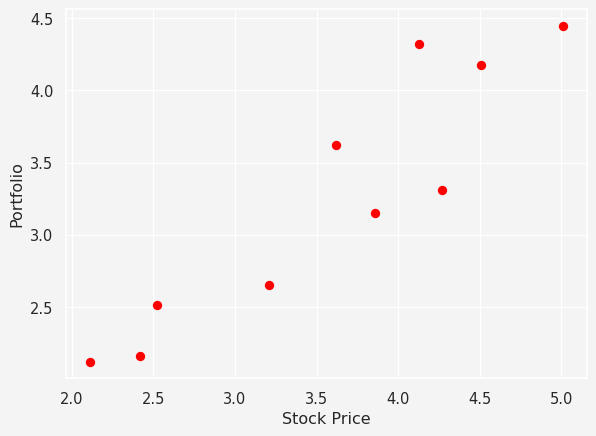

In [2]:
from mywebstyle import plot_style
plot_style('#f4f4f4')
import matplotlib.pyplot as plt
plt.scatter(df.StockPrice, df.Portfolio, color='red')
plt.xlabel('Stock Price')
plt.ylabel('Portfolio')
plt.show()

We can see from the graph that there appears to be a linear relationship
between the $x$ and $y$ values in this case. To find the relationship
mathematically we define the followings

Similarly,

The sample correlation coefficient $r$ is then given as

$$
r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}} = \frac{\sum x_i ^2 - n \bar{x}^2}{\sqrt{\left(\sum x_i ^2 - n \bar{x}^2\right)\left(\sum y_i ^2 - n \bar{y}^2\right)}}
$$

You may have seen a different formula to calculate this quantity which
often looks a bit different

$$
\rho = Corr(X,Y)=\frac{Cov(X,Y)}{\sqrt{var(X)var(Y)}}
$$  
The sample correlation coefficient, $r$, is an estimator of the
population correlation coefficient, $\rho$, in the same way as $\bar{X}$
is an estimator of $\mu$ or $S^2$ is an estimator of $\sigma^2$ . Now
the question is what does this $r$ values mean?

| Value | Meaning |
|-----------------------|--------------------------------------------------|
| $r=1$ | The two variables move together in the same direction in a perfect linear relationship. |
| $0 < r < 1$ | The two variables tend to move together in the same direction but there is NOT a direct relationship. |
| $r= 0$ | The two variables can move in either direction and show no linear relationship. |
| $-1 < r < 0$ | The two variables tend to move together in opposite directions but there is not a direct relationship. |
| $r =-1$ | The two variables move together in opposite directions in a perfect linear relationship. |

Let’s calculate the correlation of our stock data.

In [3]:
import math
x = df.StockPrice.values
y = df.Portfolio.values

n = len(x)

x_sum, y_sum =0,0
s_xx, s_yy, s_xy = 0,0,0
for i in range(n):
    x_sum += x[i]
    s_xx += x[i]**2
    y_sum += y[i]
    s_yy += y[i]**2
    s_xy += x[i]*y[i]    

s_xx = s_xx - (x_sum)**2/n
s_yy = s_yy - (y_sum)**2/n
s_xy = s_xy - (x_sum * y_sum)/n

r = s_xy/math.sqrt(s_xx * s_yy)

# Print with formatted labels
print(f"Sum x: {x_sum:.2f}")
print(f"Sum y: {y_sum:.2f}")
print(f"Sₓₓ: {s_xx:.2f}")
print(f"Sᵧᵧ: {s_yy:.2f}")
print(f"Sₓᵧ: {s_xy:.2f}")
print(' ')
print(f"r : {r:.2f}")

Sum x: 35.66
Sum y: 32.47
Sₓₓ: 8.53
Sᵧᵧ: 6.97
Sₓᵧ: 7.13
 
r : 0.92

## Bivariate Analysis

The joint probability density function for $X$ and $Y$ in the bivariate
normal distribution is given by:

$$
f_{X,Y}(x, y) = \frac{1}{2\pi \sigma_X \sigma_Y \sqrt{1-\rho^2}} 
\exp\left( -\frac{1}{2(1-\rho^2)} \left[ \frac{(x-\mu_X)^2}{\sigma_X^2} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X \sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma_Y^2} \right] \right)
$$

When $|\rho| = 1$, the denominator $\sqrt{1-\rho^2}$ in the PDF becomes
zero, which might appear problematic. However, what happens in this case
is that the joint distribution degenerates into a **one-dimensional
structure** (a line) rather than being a two-dimensional probability
density.

To see why, consider the quadratic term inside the exponential:

$$
Q = \frac{(x-\mu_X)^2}{\sigma_X^2} - 2\rho \frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X \sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma_Y^2}
$$

When $|\rho| = 1$, this quadratic expression simplifies, as shown next.

Start with the simplified $Q$ when $|\rho| = 1$:

This is a **perfect square** because the “cross term” cancels out all
independent variability of $X$ and $Y$ when $|\rho| = 1$.

For the quadratic term $Q$ to have any non-zero probability density
(since it appears in the exponent of the PDF), it must be equal to zero:
$$
\frac{x-\mu_X}{\sigma_X} - \rho \frac{y-\mu_Y}{\sigma_Y} = 0
$$

Rearranging this equation: $$
\frac{y-\mu_Y}{\sigma_Y} = \rho \frac{x-\mu_X}{\sigma_X}
$$

Multiply through by $\sigma_Y$: $$
y - \mu_Y = \rho \frac{\sigma_Y}{\sigma_X} (x - \mu_X)
$$

Thus:

This is the equation of a straight line in the $(X, Y)$-plane. The slope
of the line is $\rho \frac{\sigma_Y}{\sigma_X}$, and the line passes
through the point $(\mu_X, \mu_Y)$. When $|\rho| = 1$, all the joint
probability mass collapses onto this line, meaning $X$ and $Y$ are
perfectly linearly dependent.

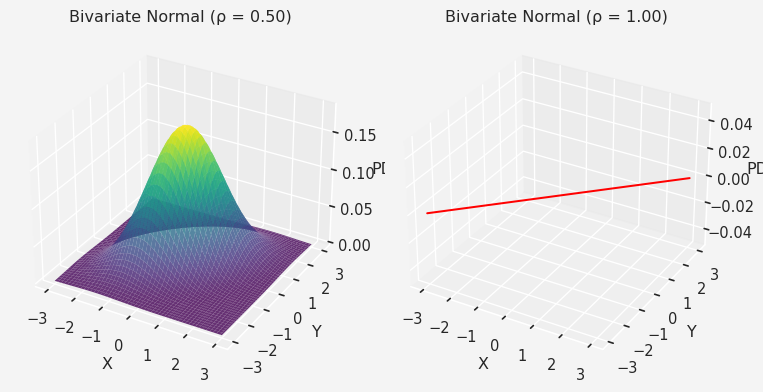

In [4]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

# Define the bivariate normal PDF
def bivariate_normal_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    z = (
        ((x - mu_x) ** 2) / sigma_x**2
        - 2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y)
        + ((y - mu_y) ** 2) / sigma_y**2
    )
    denominator = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2)
    return np.exp(-z / (2 * (1 - rho**2))) / denominator

# Parameters
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Function to plot the bivariate normal distribution and a line for rho = 1 or -1
def plot_bivariate_and_line_side_by_side(rho1, rho2):
    fig = plt.figure(figsize=(8, 4))

    # Plot for the first rho
    ax1 = fig.add_subplot(121, projection='3d')
    if abs(rho1) == 1:
        # Degenerate case: Straight line
        line_x = np.linspace(-3, 3, 100)
        line_y = line_x  # Since rho = 1 implies y = x (perfect correlation)
        ax1.plot(line_x, line_y, np.zeros_like(line_x), label=f'Degenerate Line (ρ = {rho1})', color='red')
    else:
        # General bivariate normal distribution
        Z = bivariate_normal_pdf(X, Y, 0, 0, 1, 1, rho1)
        ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

    ax1.set_title(f'Bivariate Normal (ρ = {rho1:.2f})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('PDF')

    # Plot for the second rho
    ax2 = fig.add_subplot(122, projection='3d')
    if abs(rho2) == 1:
        # Degenerate case: Straight line
        line_x = np.linspace(-3, 3, 100)
        line_y = line_x  # Since rho = 1 implies y = x (perfect correlation)
        ax2.plot(line_x, line_y, np.zeros_like(line_x), label=f'Degenerate Line (ρ = {rho2})', color='red')
    else:
        # General bivariate normal distribution
        Z = bivariate_normal_pdf(X, Y, 0, 0, 1, 1, rho2)
        ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

    ax2.set_title(f'Bivariate Normal (ρ = {rho2:.2f})')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('PDF')

    plt.tight_layout()
    plt.show()

# Plot examples side by side
plot_bivariate_and_line_side_by_side(0.5, 1)  # Example with rho = 0.5 and rho = 1

### $t-$Statistic

Under the null hypothesis, where
$H_0: \rho =0, \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$ has a $t-$ distribution
with $\nu=n-2$ degree of freedom.

### Fisher’s Transformation of $r$

If $W = \frac{1}{2}\ln{\frac{1+r}{1-r}}=\tanh^{-1}r$, then $W$ has
approximately a normal distribution with mean
$\frac{1}{2}\ln{\frac{1+\rho}{1-\rho}}$ and standard deviation
$\frac{1}{\sqrt{n-3}}$.

For our stock data:

**Null Hypothesis $H_0$:** There is no association between stock prices
and the portfolio values, i.e., $\rho =0$  
**Alternative Hypothesis $H_1$:** There is some association between the
stock price and portfolio values, i.e., $\rho > 0$

If $H_0$ is true, then the test statistic
$\frac{r\sqrt{n-2}}{\sqrt{1-r^2}}=\frac{0.92\sqrt{8}}{\sqrt{1-0.92^2}}=6.64$
has a $t_8$ distribution. The observed value $6.64$ is much greater than
the critical value of $t_8$ at $0.5\%$ level which is $3.36$.

So, we reject the null hypothesis $H_0$ at the $0.5\%$ level and
conclude that there is a very strong evidence that $\rho>0$.

Alternatively, if we want to use the Fisher’s test:

If $H_0$ is true, then the test statistic
$Z_r=\tanh^{-1}r=\tanh^{-1}(0.92)$ has a $N\left(0,\frac{1}{7}\right)$
distribution.

The observed value of this statistic is
$\frac{1}{2}\log{\frac{1+0.92}{1-0.92}}=1.589$, which corresponds to a
value of $\frac{1.589}{\sqrt{\frac{1}{7}}}=4.204$ on the $N(0,1)$
distribution. This is much greater than $3.090$, the upper $0.1\%$ point
of the standard normal distribution.

So, we reject $H_0$ at the $0.1\%$ level and conclude that there is very
strong evidence that $\rho > 0$ ie that there is a positive linear
correlation between the stock price and portfolio value.

## Regression Analysis

Given a set of points $(x_i,y_i)_{i=0}^{n}$ for a simple linear
regression of the form

$$
Y_i = \alpha +\beta x_i + \epsilon_i; \hspace{4mm} i=1,2,\cdots,n
$$

with $\mathbb{\epsilon_i}=0$ and $var[\epsilon_i]=\sigma^2$.

### Model Fitting

We can estimate the parameters from the method of least squares but
that’s not the goal in this case. Fitting the model involves finding
$\alpha$ and $\beta$ and the estimating the variance $\sigma^2$.

$$
\hat{y} = \hat{\alpha}+\hat{\beta}x
$$

where, $\hat{\beta}= \frac{S_{xy}}{S_{xx}}$ and
$\hat{\alpha} = \bar{y}-\hat{\beta}\bar{x}$

$\hat{\beta}$ is the observed value of a statistic $\hat{B}$ whose
sampling distribution has the following properties

$$
\mathbb{E}[\hat{B}]=\beta, \hspace{4mm} var[\hat{B}]=\frac{\sigma^2}{S_{xx}}
$$

And the estimate of the error variance

### Goodness of fit

To better understand the goodness of fit of the model for the data at
hand, we can study the total variation in the responses, as given by

$$
S_{yy} = \sum (y_i-\bar{y})^2
$$

Let’s see how:

In the case that the data are “close” to a line ( $|r|$ high- a strong
linear relationship) the model fits well, the fitted responses (the
values on the fitted line) are close to the observed responses, and so
$SS_{REG}$ is relatively high with $SS_{RES}$ relatively low.

In the case that the data are not “close” to a line ( $|r|$ low - a weak
linear relationship) the model does not fit so well, the fitted
responses are not so close to the observed responses, and so $SS_{REG}$
is relatively low and $SS_{RES}$ relatively high.

The proportion of the total variability of the responses “explained” by
a model is called the coefficient of determination, denoted $R^2$ .

$$
R^2 = \frac{SS_{REG}}{SS_{TOT}} =\frac{S_{xy}^2}{S_{xx}S_{yy}}
$$

which takes value between 0 to 1, inclusive. The higher $R^2$, the
better fitting.

For our data, we have:

Therefore, the fitted line would be $\hat{y}=0.266 + 0.836x$. Now we see
the other metrics

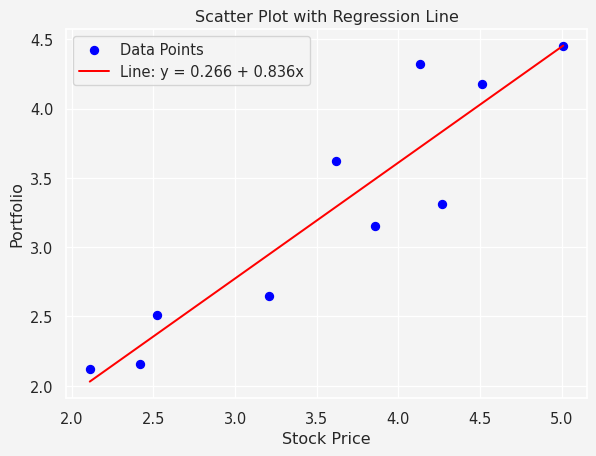

In [5]:
# Parameters for the line
alpha = 0.266  
beta = 0.836   

# Line values
line_x = np.linspace(min(df.StockPrice), max(df.StockPrice), 100)  
line_y = alpha + beta * line_x             

# Plot
plt.scatter(df.StockPrice, df.Portfolio, color='blue', label='Data Points')
plt.plot(line_x, line_y, color='red', label=f'Line: y = {alpha} + {beta}x')

# Labels and title
plt.xlabel('Stock Price')
plt.ylabel('Portfolio')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()

### Inference on $\beta$

We can rewrite $\hat{\beta}= \frac{S_{xy}}{S_{xx}}$, as

Now we recall that $\hat{B}$ is the random variable that has
$\hat{\beta}$ as its realization. Therefore,
$\hat{B}=\frac{\sum (x_i-\bar{x})Y_i}{S_{xx}}$. We also recall that
$\mathbb{E}(Y_i)=\alpha +\beta x$. Putting these together we obtain,

Now the fact that $Y_i'$s are uncorrelated. Therefore,
$var\left(\sum (Y_i)\right)=\sum var(Y_i)$ and we have
$var(Y_i)=\sigma^2$. Therefore,

Since $\mathbb{E}(\hat{\beta})=\beta$ and
$var(\hat{\beta})=\frac{\sigma^2}{S_{xx}}$ so

$$
M = \frac{\hat{\beta}-\beta}{\sqrt{\frac{\sigma^2}{S_{xx}}}}\sim N(0,1)
$$

and the observed variance $\hat{\sigma}^2$ has the property

$$
N = \frac{(n-2)\hat{\sigma}^2}{\sigma^2} \sim \chi_{n-2}^2
$$

Since $\hat{\beta}$ and $\hat{\sigma}^2$ are independent, it follows
that

$$
\frac{M}{\sqrt{\frac{N}{n-2}}} \sim t_{n-2}
$$

In other words: $$
\frac{\hat{\beta}-\beta}{se(\hat{\beta})} = \frac{\hat{\beta}-\beta}{\sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}} \sim t_{n-2}
$$

Now the big question is what’s the use of this mathematical jargon that
we have learned so far? Let’s use our regression problem on stock data
to explain.

**$H_0: \beta =0$, there is no linear relationship**  
vs  
**$H_1: \beta> 0$, there is a linear relationship**

Based on our data we have $\hat{\beta} = 0.836$ and
$\hat{\sigma}^2=0.1594$, and $S_{xx}=8.53$. Therefore, under $H_0$, the
test statistic

$$
\frac{\hat{\beta}-0}{\sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}} \text{ has a } t_{10-2} \text{ or } t_8 \text{ distribution}
$$

But the observed value of this statistic $$
\frac{0.836-0}{\sqrt{0.1594/8.53}}=6.1156
$$

which is way higher than the critical value at $5\%$ significance level.

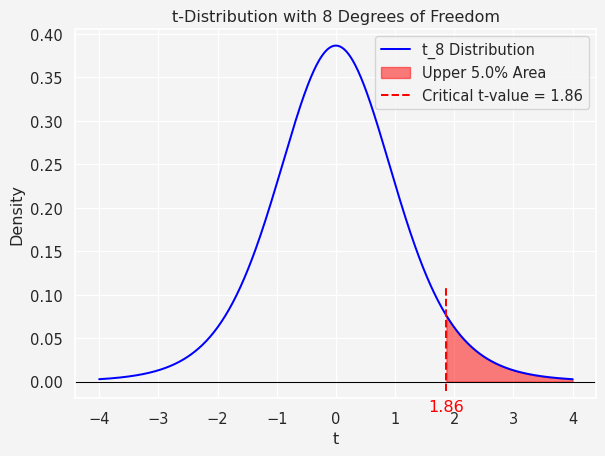

In [6]:
from scipy.stats import t

# Parameters
df = 8  # Degrees of freedom
alpha = 0.05  # Upper tail probability
t_critical = t.ppf(1 - alpha, df)  # Critical t-value at the 95th percentile

# Generate x values for the t-distribution
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Plot the t-distribution
plt.plot(x, y, label=f't_{df} Distribution', color='blue')
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.5, label=f'Upper {alpha*100}% Area')

# Annotate the critical t-value on the x-axis
plt.axvline(t_critical, ymin=0.02, ymax=0.30,color='red', linestyle='--', label=f'Critical t-value = {t_critical:.2f}')
plt.text(t_critical, -0.02, f'{t_critical:.2f}', color='red', ha='center', va='top')

# Add a horizontal line at y = 0
plt.axhline(0, color='black', linestyle='-', linewidth=0.8)

# Labels, title, and legend
plt.title(f"t-Distribution with {df} Degrees of Freedom")
plt.xlabel("t")
plt.ylabel("Density")
plt.legend()

# Adjust plot limits


# Show plot
plt.show()

So, we reject the null hypothesis $H_0$ at the $5\%$ level and conclude
that there is a very strong evidence that $\beta>0$, i.e., the portfolio
value is increasing over stock price.

**Alternatively,** let’s put our analysis in a different approach. We
claim that

**$H_0: \beta=1$, there is a linear relationship**  
vs  
**$H_1: \beta \ne 1$**

In this case,

$$
se(\hat{\beta}) = \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}} = \sqrt{\frac{0.1594}{8.53}} =0.1367
$$

Therefore, the $95\%$ confidence interval for $\beta$ is

$$
\hat{\beta} \pm \left\{t_{0.025,8}\times se(\hat{\beta})\right\}=0.836 \pm 2.306\times 0.1367 = (0.5207,1.1512) 
$$

The $95\%$ two-sided confidence interval contains the value $1$, so the
two-sided test conducted at $5\%$ level results in $H_0$ being accepted.

### Mean Response and Individual Response

#### Mean Response

If $\mu_0$ is the expected (mean) response for a value $x_0$ of the
predictor variable, that is
$\mu_0 = \mathbb{E}[Y|x_0]=\alpha +\beta x_0$, then $\mu_0$ is an
unbiased estimator given by

$$
\hat{\mu}_0 = \hat{\alpha}+\hat{\beta} x_0
$$

and the variance of the estimator is given by

$$
var(\hat{\mu}_0) = \left(\frac{1}{n}+\frac{(x_0-\bar{x})^2}{S_{xx}}\right)\sigma^2
$$

Therefore,

$$
\frac{\hat{\mu}_0-\mu_0}{se[\hat{\mu}_0] }= \frac{\hat{\mu}_0-\mu_0}{\sqrt{\left(\frac{1}{n}+\frac{(x_0-\bar{x})^2}{S_{xx}}\right)\sigma^2}}\sim t_{n-2}
$$

#### Individual Response

The actual estimate of an individual response $$
\hat{y}_0 = \hat{\alpha} +\hat{\beta}x_0
$$

However, the uncertainty associated with this estimator, as indicated by
its variance, is higher compared to the mean estimator because it relies
on the value of an individual response $y_0$ rather than the more stable
mean. To account for the additional variability of an individual
response relative to the mean, an extra term, $\sigma^2$, must be
included in the variance expression for the estimator of a mean
response.

$$
var[\hat{y}_0] = \left(1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{S_{xx}}\right)\sigma^2
$$

Thus,

$$
\frac{\hat{y}-y_0}{se[\hat{y}_0]}=\frac{\hat{y}-y_0}{\sqrt{\left(1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{S_{xx}}\right)\sigma^2}}\sim t_{n-2}
$$

Let’s put this two idea through our example. If we want to find a $95\%$
confidence interval or the expected portfolio value on stock price of
say, 360. In that case,

$$
\text{Estimate of the expected portfolio value} = 0.266+0.836\times 3.6 = 3.276
$$

and

$$
\text{se}[\text{Estimate}] = \sqrt{\left(\frac{1}{10}+\frac{(3.6-3.566)^2}{8.53}\right) 0.1594}=0.1263
$$

So, the $95\%$ CI

$$
3.276\pm (t_{0.025,8}\times \text{se}[\text{Estimate}]) = 3.276 \pm 2.306\times 0.1263 = (2.985,3.567)
$$

That is for a stock price of $\$360$, the expected portfolio value would
be in the range of $(\$298.50,\$356.70)$

Similarly, the $95\%$ CI for the predicted actual portfolio value

or $(\$231.03,\$424.17)$

### Model Accuracy

The residual from the fit at $x_i$ is the estimated error which is
defined by $$
\hat{\epsilon}_i = y_i - \hat{y}_i
$$

Scatter plots of residuals versus the explanatory variable (or the
fitted response values) are particularly insightful. A lack of random
scatter in the residuals, such as the presence of a discernible pattern,
indicates potential shortcomings in the model.

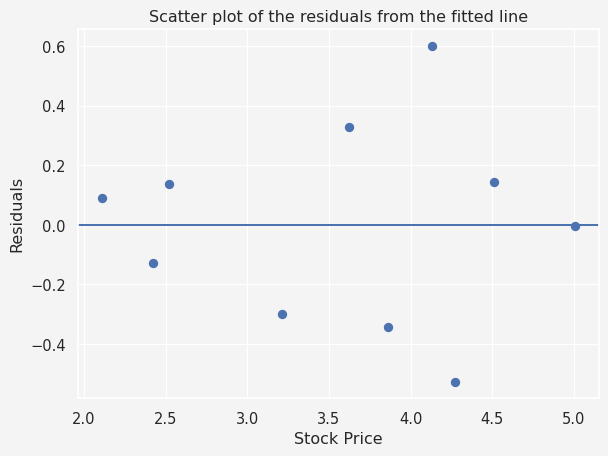

In [7]:
df = pd.DataFrame({
    'Stock': ['Apple', 'Citi', 'MS', 'WF', 'GS', 'Google', 'Amazon', 'Tesla', 'Toyota', 'SPY'],
    'StockPrice': [2.11, 2.42, 2.52, 3.21, 3.62, 3.86, 4.13, 4.27, 4.51, 5.01], 
    'Portfolio': [2.12, 2.16, 2.51, 2.65, 3.62, 3.15, 4.32, 3.31, 4.18, 4.45]
})
x = df.StockPrice.values
y = df.Portfolio.values 

y_hat = [0.266+0.836*i for i in x]
plt.scatter(x, y-y_hat)
plt.axhline(0)
plt.ylabel('Residuals')
plt.xlabel('Stock Price')
plt.title('Scatter plot of the residuals from the fitted line')
plt.show()

In this plot, we can see that the residuals tend to increase as $x$
increases, indicates that the error variance is not bounded, but
increasing with $x$. So, the model is not the best one. A transformation
of the responses may stabilize the error variance. <br> <br> In certain
case, for some growth models, the appropriate model is that the expected
response is related to the exploratory variable through an exponential
relationship, i.e.,

In [8]:
x = df.StockPrice.values
y = np.log(df.Portfolio.values)

n = len(x)

x_sum, y_sum =0,0
s_xx, s_yy, s_xy = 0,0,0
for i in range(n):
    x_sum += x[i]
    s_xx += x[i]**2
    y_sum += y[i]
    s_yy += y[i]**2
    s_xy += x[i]*y[i]    

s_xx = s_xx - (x_sum)**2/n
s_yy = s_yy - (y_sum)**2/n
s_xy = s_xy - (x_sum * y_sum)/n

r = s_xy/math.sqrt(s_xx * s_yy)

# Print with formatted labels
print(f"Sum x: {x_sum:.2f}")
print(f"Sum y: {y_sum:.2f}")
print(f"Sₓₓ: {s_xx:.2f}")
print(f"Sᵧᵧ: {s_yy:.2f}")
print(f"Sₓᵧ: {s_xy:.2f}")
print(' ')
print(f"r : {r:.2f}")

Sum x: 35.66
Sum y: 11.43
Sₓₓ: 8.53
Sᵧᵧ: 0.70
Sₓᵧ: 2.29
 
r : 0.94

Now we have:

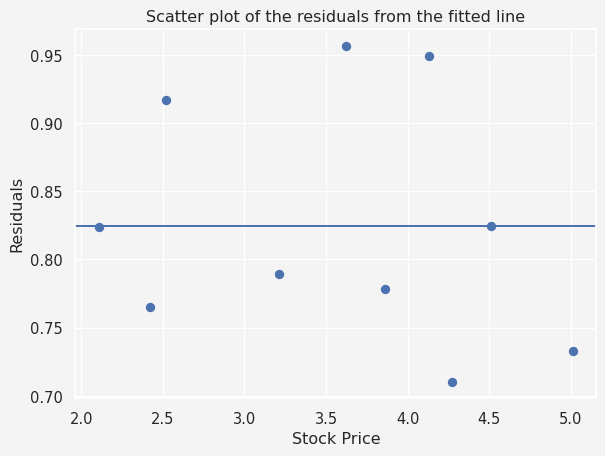

In [9]:
import numpy as np
z_hat = [np.log(0.1873)+0.268*i for i in x]
z = np.log(y)
plt.scatter(x, z-z_hat)
plt.axhline(np.mean(z-z_hat))
plt.ylabel('Residuals')
plt.xlabel('Stock Price')
plt.title('Scatter plot of the residuals from the fitted line')
plt.show()

Now the residuals look good, that is no special pattern or increasing
the error variance.

Thanks for reading.

## References

1.  **Montgomery, D. C., & Runger, G. C.** (2014). *Applied Statistics
    and Probability for Engineers*. Wiley.  
2.  **Casella, G., & Berger, R. L.** (2002). *Statistical Inference*.
    Duxbury.  
3.  **Cohen, J., Cohen, P., West, S. G., & Aiken, L. S.** (2003).
    *Applied Multiple Regression/Correlation Analysis for the Behavioral
    Sciences*. Routledge.  
4.  **Seber, G. A. F., & Lee, A. J.** (2003). *Linear Regression
    Analysis*. Wiley.
5.  **Neter, J., Kutner, M. H., Nachtsheim, C. J., & Wasserman, W.**
    (1996). *Applied Linear Statistical Models*. Irwin.  
6.  **Hastie, T., Tibshirani, R., & Friedman, J.** (2009). *The Elements
    of Statistical Learning: Data Mining, Inference, and Prediction*.
    Springer.  
7.  **Weisberg, S.** (2005). *Applied Linear Regression*. Wiley.  
8.  **Bivariate Normal Distribution Explanation**:
    -   Rice, J. A. (2006). *Mathematical Statistics and Data Analysis*.
        Thomson Brooks/Cole.  
    -   A detailed exploration of the bivariate normal distribution and
        its properties.
9.  **Fisher’s Transformation of Correlation Coefficients**:
    -   Fisher, R. A. (1921). *On the probable error of a coefficient of
        correlation*. Metron, 1, 3-32.  
    -   The foundational paper describing Fisher’s transformation and
        its use in hypothesis testing.

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/jobandintern/correlationandregression/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/jobandintern/correlationandregression/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/jobandintern/correlationandregression/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**